Voorpagina
=======================

In [33]:
import os
import pandas as pd
from zipfile import ZipFile
import numpy as np
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt
import re

os.getcwd()

# Download BRON
#!wget https://www.rijkswaterstaat.nl/apps/geoservices/geodata/dmc/bron/01-01-2010_31-12-2019.zip

'/mnt/c/Users/stijn/OneDrive/Bureaublad/Afstudeerproject/afstudeerproject_repo/scriptie'

In [16]:
!ls

# Locate BRON.zip
!ls -l 01-01-2010_31-12-2019.zip

01-01-2010_31-12-2019.zip  _toc.yml	     introductie.md   references.bib
Data			   abstract.md	     markdown.md      referentie.md
_build			   images	     methoden.md      requirements.txt
_config.yml		   inhoudsopgave.md  notebooks.ipynb  voorpagina.ipynb
-rwxrwxrwx 1 smwhering smwhering 186927157 Jul 20  2020 01-01-2010_31-12-2019.zip


In [70]:
# Regex pattern to match names of .txt files in dataset
regex = '([^\/]+(?=\.txt))'
  
# specifying the zip file name
file_name = "01-01-2010_31-12-2019.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipf:
    # printing all the contents of the zip file
    df_dct = {}
    
    # Create a dict with al the dataframe .txt tables, the key is the name of this table
    for df in zipf.namelist(): 
        if '.txt' in df and 'Definitie' not in df:
            name = re.findall(regex, df)[0] + '_df'
            if 'ongevallen' in name:
                dataframe = pd.read_csv(zipf.open(df, mode='r'), encoding = 'ISO-8859-1').head()
                # Drop AVG columns
                dataframe.drop(['DATUM_VKL', 'DAG_CODE', 'TIJDSTIP', 'DDL_ID', 'AP4_CODE', 'AP5_CODE', 'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'ANTL_SEH', 'ANTL_GOV', 'ANTL_TDT'], axis=1,  inplace=True)
            
            
            df_dct[name] = dataframe
     
    
#     # Year Filter
#     puntlocaties = zipf.open('01-01-2010_31-12-2019/PGS0112-o-CSV-bestand-J-1-N-J-N/Netwerkgegevens/puntlocaties.txt', mode='r')
#     puntlocaties_df = pd.read_csv(puntlocaties)
    
#     ongevallen = zipf.open('01-01-2010_31-12-2019/PGS0112-o-CSV-bestand-J-1-N-J-N/Ongevallengegevens/ongevallen.txt', mode='r')
#     ongevallen_df = pd.read_csv(ongevallen, encoding = 'ISO-8859-1')
#     # Drop columns where variables are blank because of AVG
#     ongevallen_df.drop(['DATUM_VKL', 'DAG_CODE', 'TIJDSTIP', 'DDL_ID', 'AP4_CODE', 'AP5_CODE', 'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'ANTL_SEH', 'ANTL_GOV', 'ANTL_TDT'], axis=1,  inplace=True)
    
    
    
#     partijen = zipf.open('01-01-2010_31-12-2019/PGS0112-o-CSV-bestand-J-1-N-J-N/Ongevallengegevens/partijen.txt', mode='r')
#     partijen_df = pd.read_csv(partijen)    
    
#     # Drop columns where variables are blank because of AVG
#     partijen_df.drop(['NTT_CODE_V', 'GEBDAT', 'GEBJAAR', 'LEEFTIJD', 'NTT_CODE_B', 'BLAASTEST', 'ART8', 'MEDICGEBR', 'TDT_ID_1', 'TDT_ID_2', 'TDT_ID_3'], axis=1,  inplace=True)
#     partijen_df.dropna(axis=1, how='all', inplace=True)
    
    
#     display(puntlocaties_df.head())
#     display(puntlocaties_df.columns)
#     display(partijen_df.head())
#     display(partijen_df.columns)
#     display(ongevallen_df.head())
#     display(ongevallen_df.columns)



/home/smwhering/miniconda3/envs/datasc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (6,7,8,29,31,33,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/smwhering/miniconda3/envs/datasc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,24,25,29,31,34,35,39,43,47,52,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/smwhering/miniconda3/envs/datasc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (29,31,36,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
# Remove AVG columns from table, these are all NaN values

df_dct['ongevallen_df'].drop(['DATUM_VKL', 'DAG_CODE', 'TIJDSTIP', 'DDL_ID', 'AP4_CODE', 'AP5_CODE', 'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'ANTL_SEH', 'ANTL_GOV', 'ANTL_TDT'], axis=1,  inplace=True)
df_dct['ongevallen_df'] = df_dct['ongevallen_df'].dropna(axis=1, how='all', inplace=True)

# Drop columns where variables are blank because of AVG
df_dct['partijen_df'] = df_dct['partijen_df'].drop(['NTT_CODE_V', 'GEBDAT', 'GEBJAAR', 'LEEFTIJD', 'NTT_CODE_B', 'BLAASTEST', 'ART8', 'MEDICGEBR', 'TDT_ID_1', 'TDT_ID_2', 'TDT_ID_3'], axis=1,  inplace=True)
df_dct['partijen_df'] = df_dct['partijen_df'].dropna(axis=1, how='all', inplace=True)

display(df_dct['ongevallen_df'].head())
display(df_dct['partijen_df'].head())

AttributeError: 'NoneType' object has no attribute 'dropna'

#### Ongevallen

Eerste filteren we collumen met alleen maar NaN waardes uit de DF. 
Daarna wordt er gefilterd op colomnen met weinig rijen uit de data, hierdoor word de maximale hoeveelheid data behouden.

In [28]:
# Filteren op: "VKL_NUMMER", "NIVEAUKOP", "JAAR_VKL", "AP3_CODE", "AOL_ID", "MAXSNELHD", "BEBKOM", "UUR", "ANTL_PTJ", "MNE_CODE",  "WSE_ID", "WVL_ID",
#                                   "WVG_ID", "WDK_ID", "WGD_CODE_1", "WGD_CODE_2", "BZD_ID_VM1", "FK_VELD5", "GME_NAAM", "DAGTYPE", "IND_ALC"
ongevallen_df.dropna(1, how='all', inplace=True)
ongevallen_sub = ongevallen_df.loc[:, ('VKL_NUMMER', 'NIVEAUKOP', 'JAAR_VKL', 'AP3_CODE', 'AOL_ID',
                                    'MAXSNELHD', 'BEBKOM', 'ANTL_PTJ', 'WSE_ID', 'WVL_ID', 'WVG_ID',
                                    'WDK_ID', 'WGD_CODE_1', 'WGD_CODE_2', 'BZD_ID_VM1', "BZD_ID_VM2", 
                                    "BZD_ID_VM3", 'FK_VELD5', 'GME_NAAM', 'IND_ALC')]
display(ongevallen_sub.head())
display(ongevallen_sub.shape)
display(ongevallen_sub.columns)

display(ongevallen_sub.info())
display(ongevallen_sub.describe())


VKL_NUMMER NIVEAUKOP  JAAR_VKL AP3_CODE  AOL_ID  MAXSNELHD BEBKOM  \
0  20119069901         G      2011      UMS       0        NaN    NaN   
1  20119069902         S      2011      UMS       0        NaN    NaN   
2  20119069903         E      2011      UMS       0        NaN    NaN   
3  20119069904         S      2011      UMS       0        NaN    NaN   
4  20119069905         E      2011      UMS       0        NaN    NaN   

   ANTL_PTJ  WSE_ID  WVL_ID  WVG_ID  WDK_ID WGD_CODE_1 WGD_CODE_2  BZD_ID_VM1  \
0         0     NaN     NaN     NaN     NaN        NaN        NaN         NaN   
1         0     NaN     NaN     NaN     NaN        NaN        NaN         NaN   
2         0     NaN     NaN     NaN     NaN        NaN        NaN         NaN   
3         0     NaN     NaN     NaN     NaN        NaN        NaN         NaN   
4         0     NaN     NaN     NaN     NaN        NaN        NaN         NaN   

   BZD_ID_VM2  BZD_ID_VM3           FK_VELD5    GME_NAAM IND_ALC  
0         NaN         NaN      WVK0412316001     Brummen     NaN  
1         NaN         NaN      WVK0342365005  Harderwijk     NaN  
2         NaN         NaN  HTT04193180030263     Zutphen     NaN  
3         NaN         NaN      WVK0482294002  Oost Gelre     NaN  
4         NaN         NaN      WVK0341370003  Harderwijk     NaN

(1128636, 20)

Index(['VKL_NUMMER', 'NIVEAUKOP', 'JAAR_VKL', 'AP3_CODE', 'AOL_ID',
       'MAXSNELHD', 'BEBKOM', 'ANTL_PTJ', 'WSE_ID', 'WVL_ID', 'WVG_ID',
       'WDK_ID', 'WGD_CODE_1', 'WGD_CODE_2', 'BZD_ID_VM1', 'BZD_ID_VM2',
       'BZD_ID_VM3', 'FK_VELD5', 'GME_NAAM', 'IND_ALC'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128636 entries, 0 to 1128635
Data columns (total 20 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   VKL_NUMMER  1128636 non-null  int64  
 1   NIVEAUKOP   1128636 non-null  object 
 2   JAAR_VKL    1128636 non-null  int64  
 3   AP3_CODE    1128636 non-null  object 
 4   AOL_ID      1128636 non-null  int64  
 5   MAXSNELHD   587641 non-null   float64
 6   BEBKOM      459974 non-null   object 
 7   ANTL_PTJ    1128636 non-null  int64  
 8   WSE_ID      537441 non-null   float64
 9   WVL_ID      530636 non-null   float64
 10  WVG_ID      524077 non-null   float64
 11  WDK_ID      526028 non-null   float64
 12  WGD_CODE_1  518548 non-null   object 
 13  WGD_CODE_2  358 non-null      object 
 14  BZD_ID_VM1  57443 non-null    float64
 15  BZD_ID_VM2  3884 non-null     float64
 16  BZD_ID_VM3  230 non-null      float64
 17  FK_VELD5    1128636 non-null  object 
 18  GME_NAAM    1128636 no

None

VKL_NUMMER      JAAR_VKL        AOL_ID     MAXSNELHD      ANTL_PTJ  \
count  1.128636e+06  1.128636e+06  1.128636e+06  587641.00000  1.128636e+06   
mean   2.015222e+10  2.014785e+03  2.589346e+00      67.78608  1.084565e+00   
std    2.734889e+07  2.915673e+00  3.550801e+00      29.60950  1.142162e+00   
min    2.010001e+10  2.010000e+03  0.000000e+00      15.00000  0.000000e+00   
25%    2.012907e+10  2.012000e+03  0.000000e+00      50.00000  0.000000e+00   
50%    2.015008e+10  2.015000e+03  0.000000e+00      50.00000  1.000000e+00   
75%    2.017908e+10  2.017000e+03  7.000000e+00      80.00000  2.000000e+00   
max    2.019918e+10  2.019000e+03  9.000000e+00     130.00000  4.500000e+01   

              WSE_ID        WVL_ID         WVG_ID         WDK_ID  \
count  537441.000000  530636.00000  524077.000000  526028.000000   
mean        2.554924       1.85873       2.135499       1.298874   
std         1.738155       0.54195       0.817244       0.496255   
min         1.000000       1.00000       1.000000       1.000000   
25%         1.000000       2.00000       2.000000       1.000000   
50%         2.000000       2.00000       2.000000       1.000000   
75%         4.000000       2.00000       2.000000       2.000000   
max         8.000000       3.00000       5.000000       3.000000   

         BZD_ID_VM1   BZD_ID_VM2  BZD_ID_VM3  
count  57443.000000  3884.000000  230.000000  
mean     121.904845   150.710608  159.913043  
std       13.104352    12.105625   11.967617  
min      100.000000   120.000000  140.000000  
25%      110.000000   140.000000  160.000000  
50%      120.000000   160.000000  160.000000  
75%      120.000000   160.000000  170.000000  
max      180.000000   180.000000  180.000000

### Visualisatie: Ongevallen

Vervolgens kijken we naar de columen opzich om te kunnen achterhalen waar de meeste rijen zich bevinden.

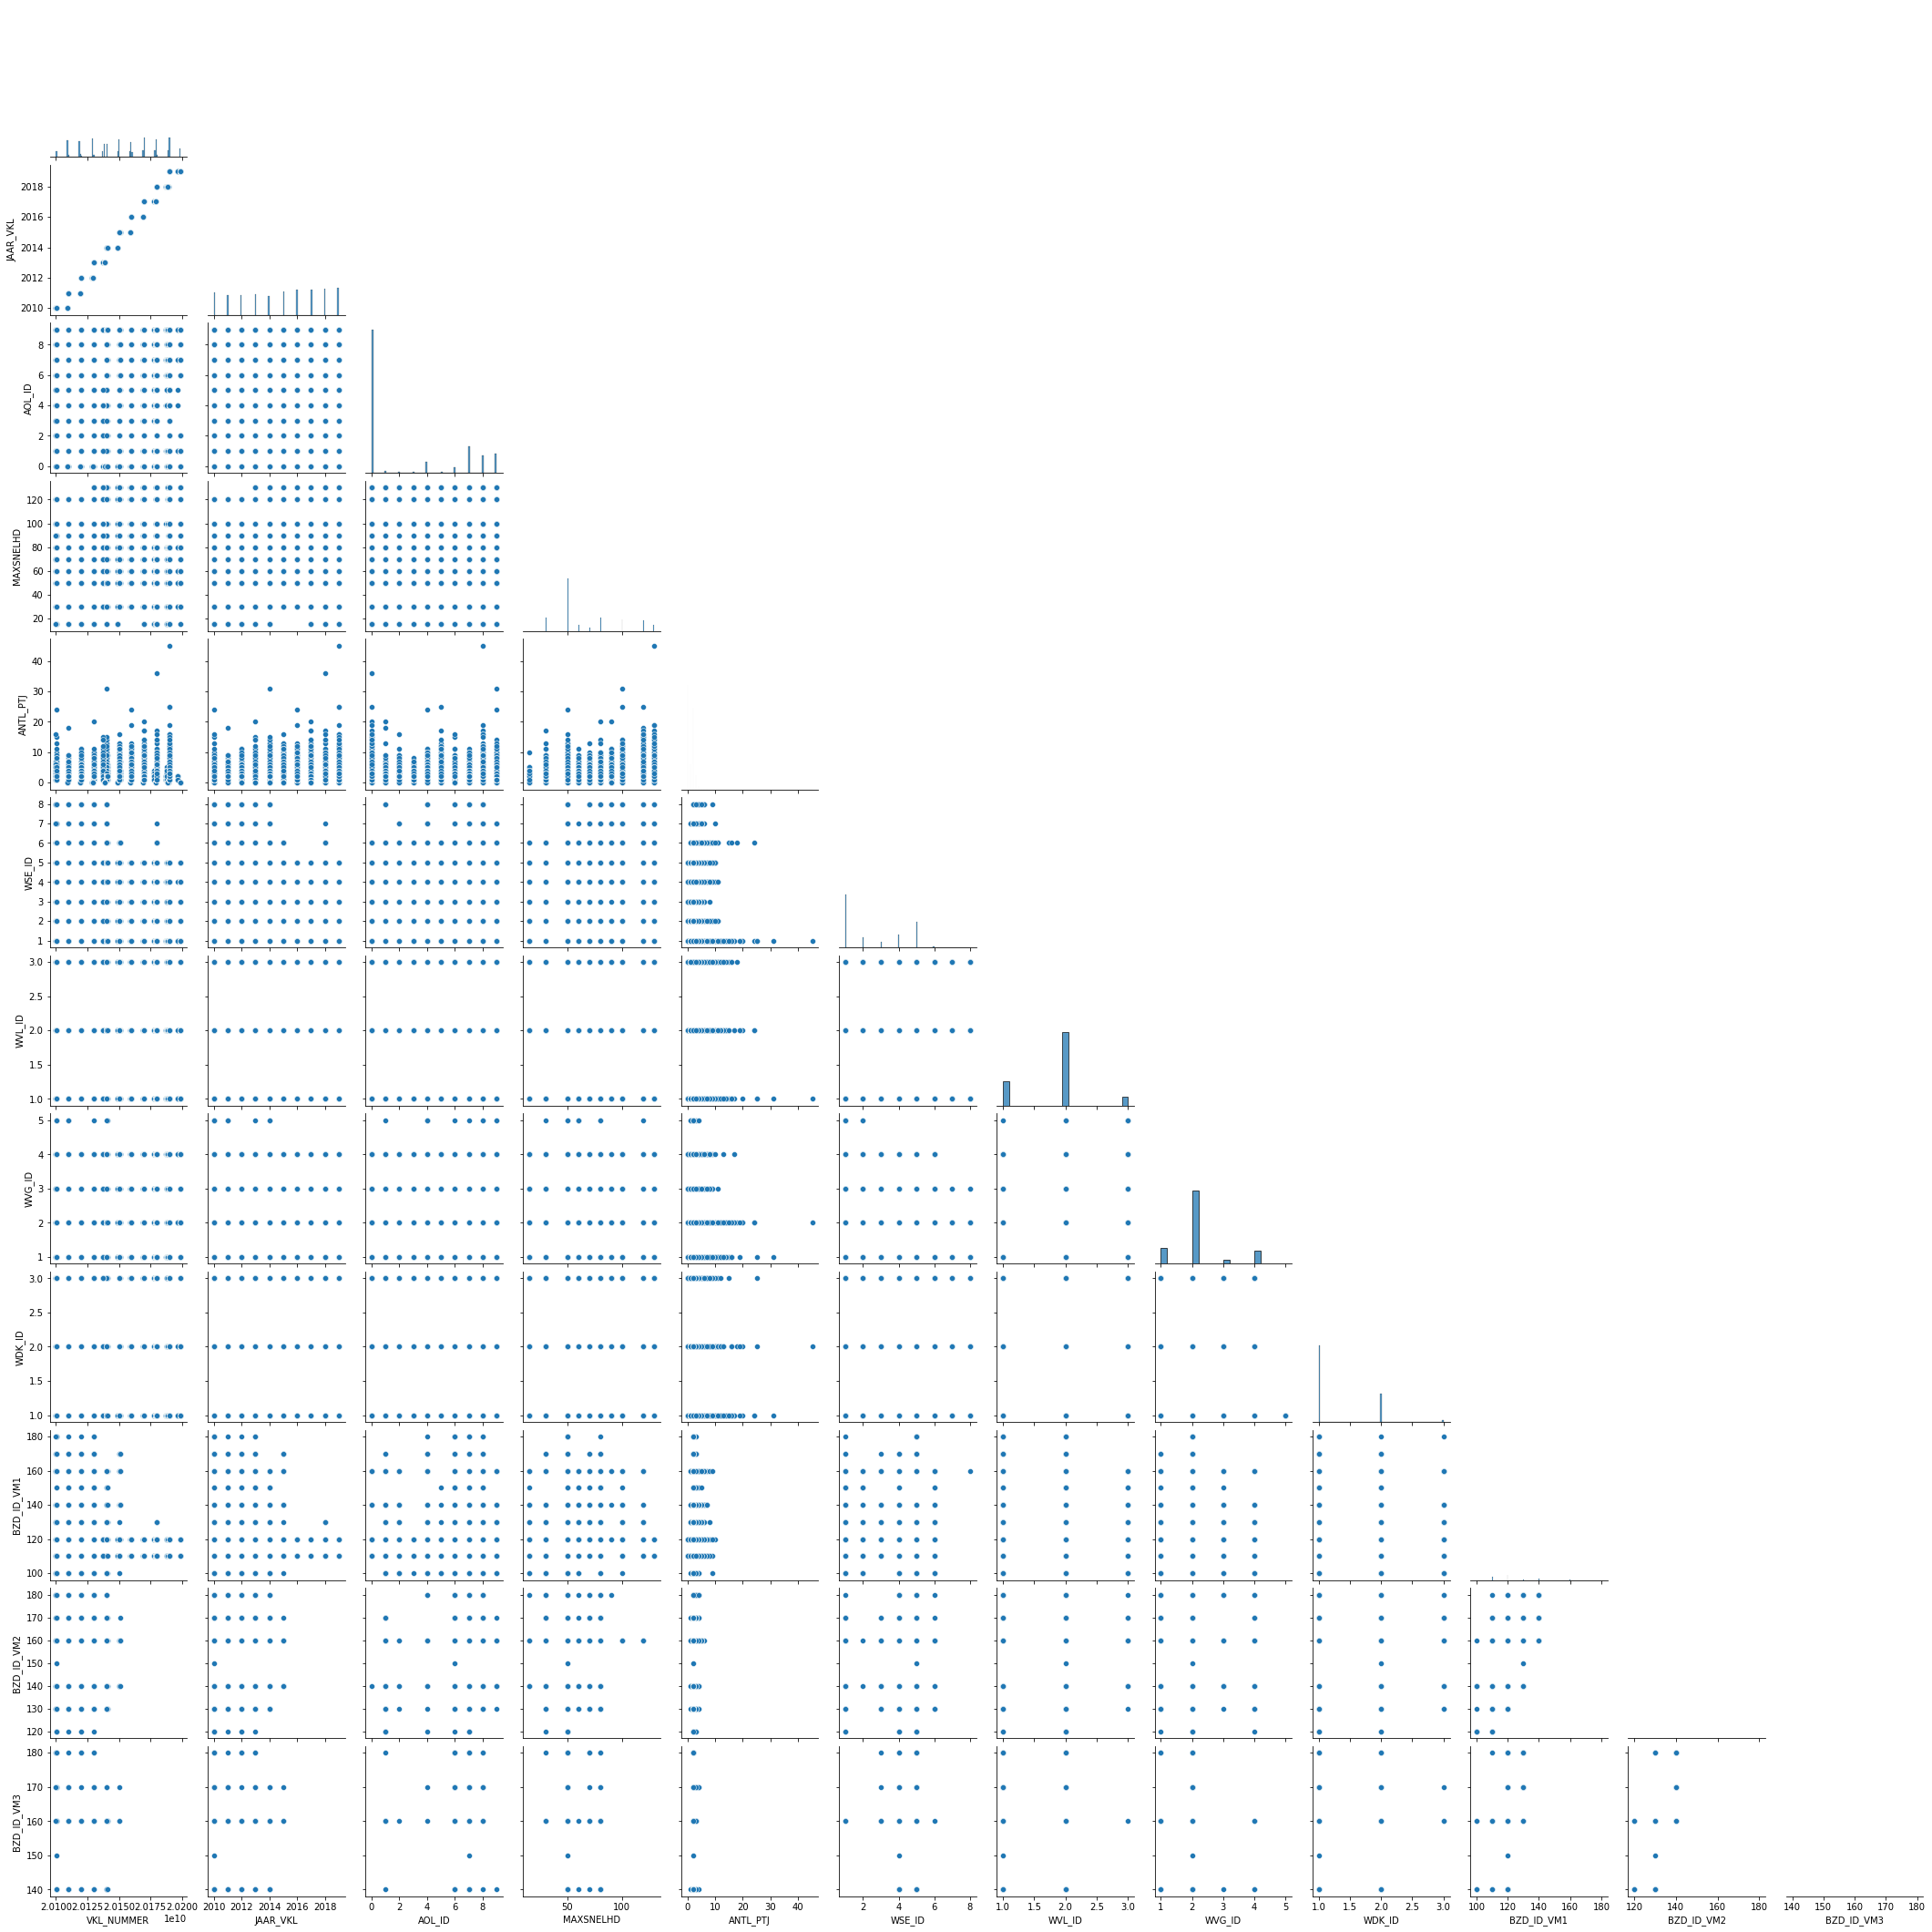

In [29]:
sb.pairplot(ongevallen_sub, corner=True)

/home/smwhering/miniconda3/envs/datasc/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<AxesSubplot:title={'center':'VKL_NUMMER'}>,
        <AxesSubplot:title={'center':'JAAR_VKL'}>,
        <AxesSubplot:title={'center':'AOL_ID'}>],
       [<AxesSubplot:title={'center':'MAXSNELHD'}>,
        <AxesSubplot:title={'center':'ANTL_PTJ'}>,
        <AxesSubplot:title={'center':'WSE_ID'}>],
       [<AxesSubplot:title={'center':'WVL_ID'}>,
        <AxesSubplot:title={'center':'WVG_ID'}>,
        <AxesSubplot:title={'center':'WDK_ID'}>],
       [<AxesSubplot:title={'center':'BZD_ID_VM1'}>,
        <AxesSubplot:title={'center':'BZD_ID_VM2'}>,
        <AxesSubplot:title={'center':'BZD_ID_VM3'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

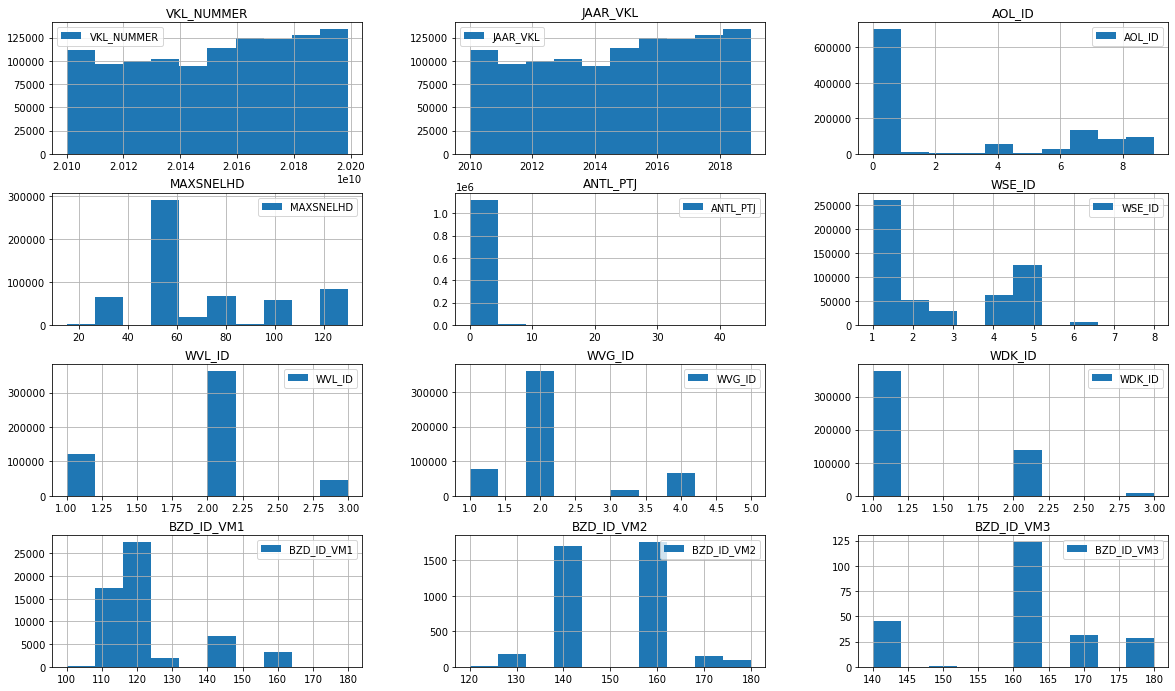

In [21]:
fig, ax = plt.subplots(figsize = (20,15))
ongevallen_sub.hist(layout=(5,3), legend=True, ax = ax)

### Visualisatie: Partijen

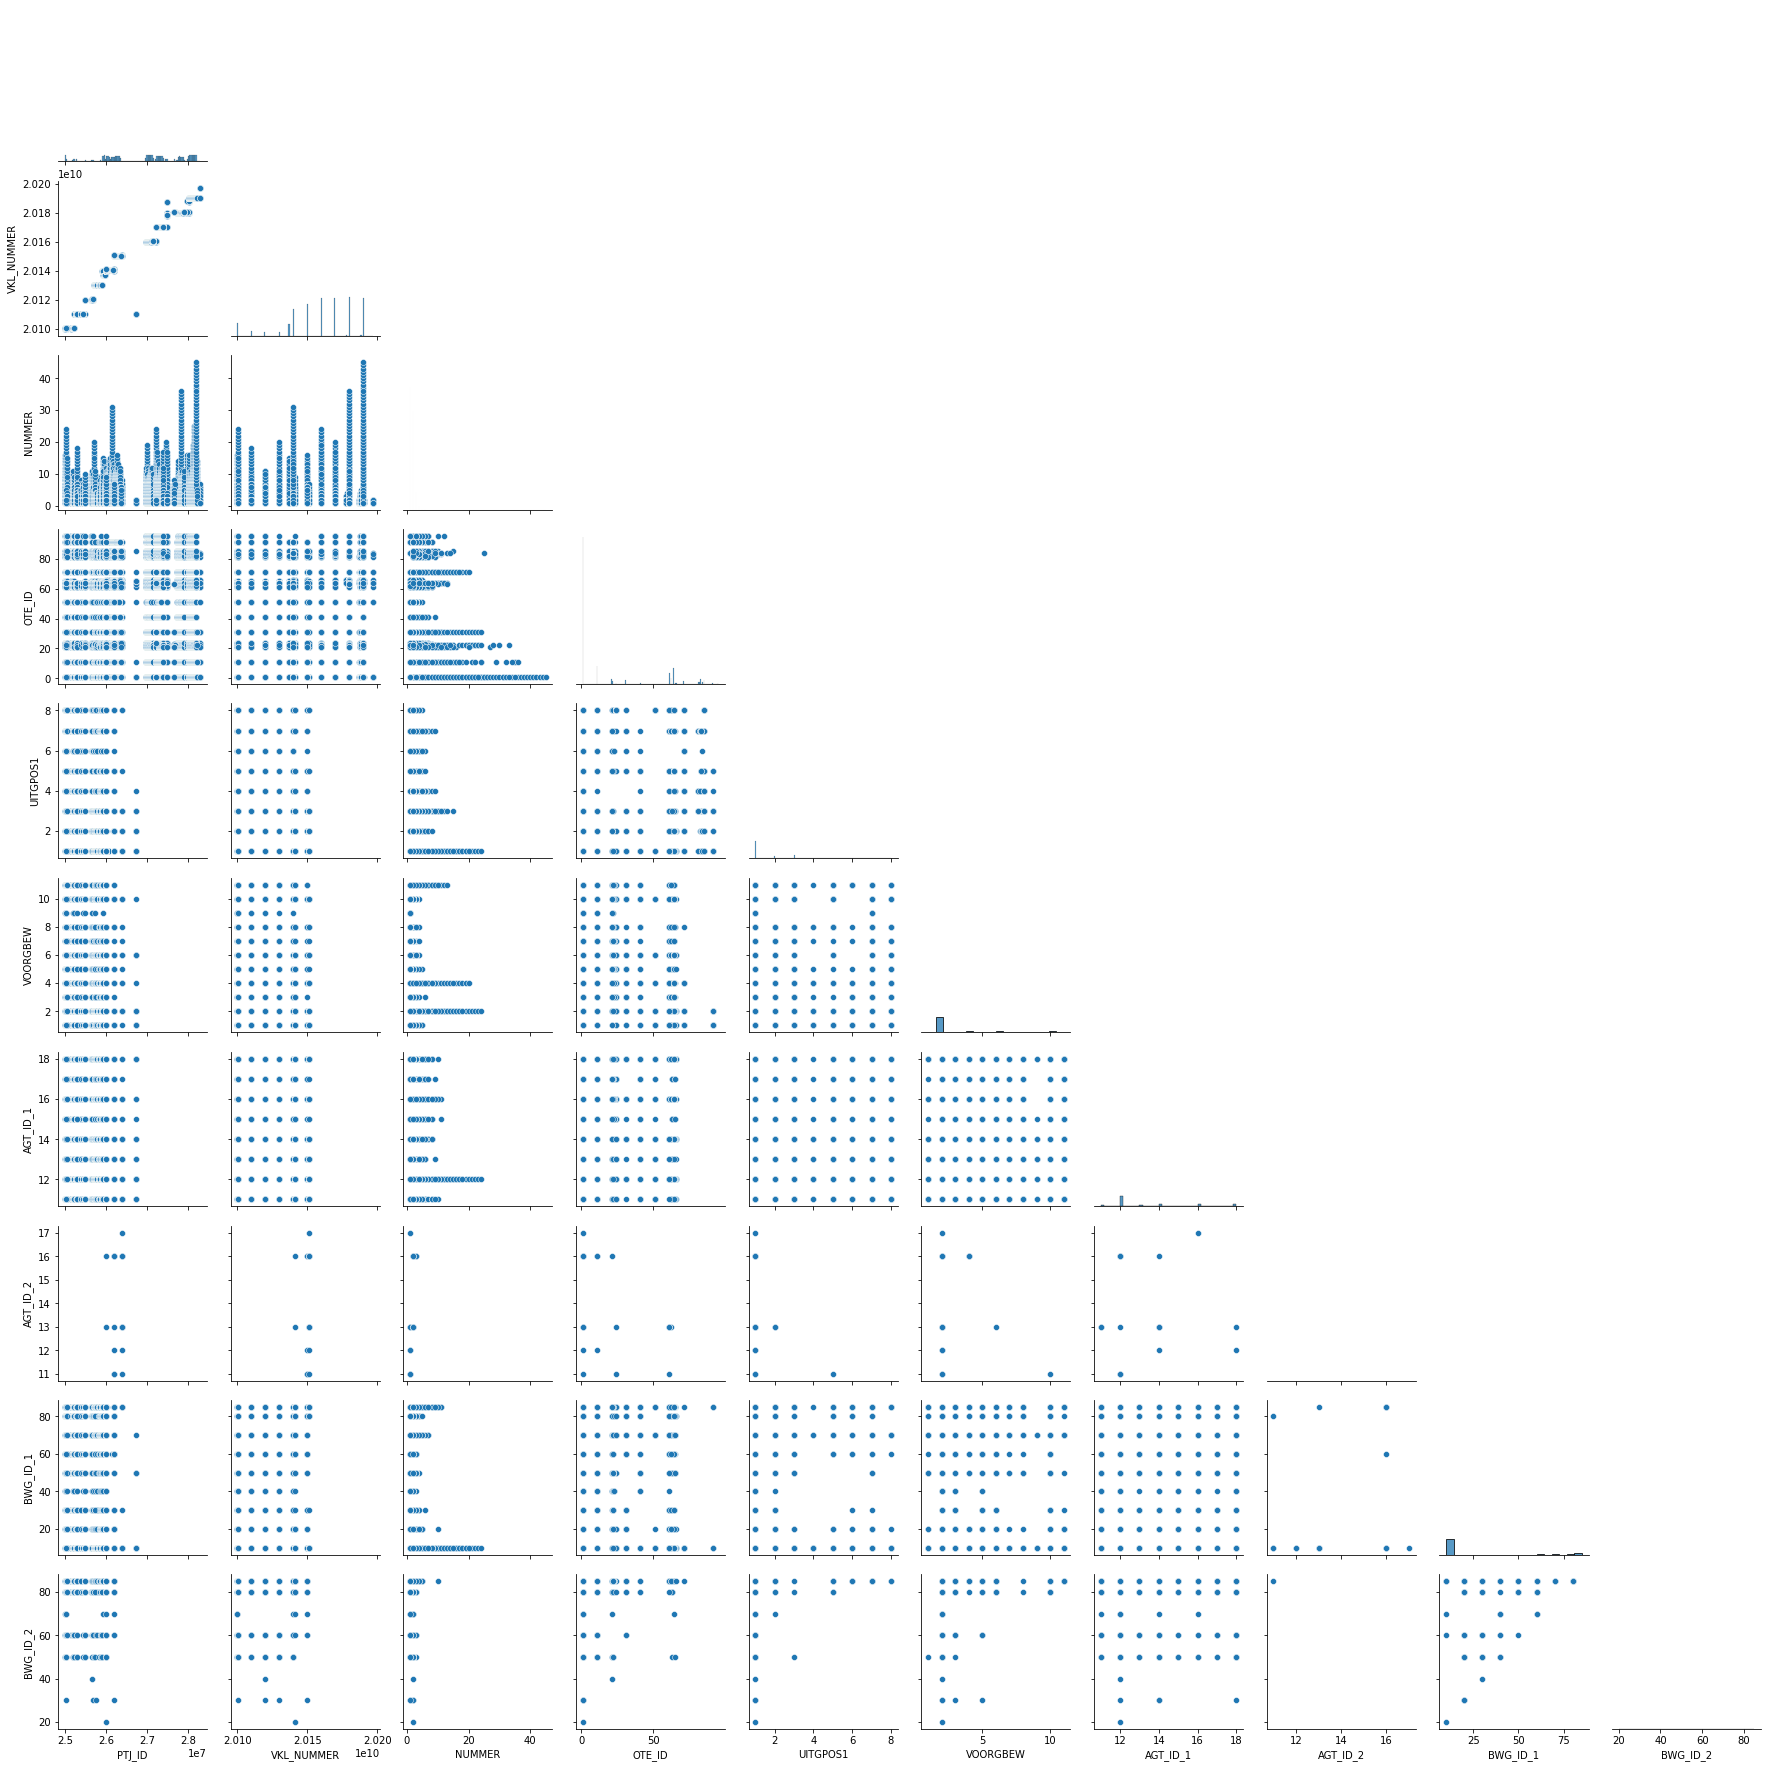

In [30]:
sb.pairplot(partijen_df, corner=True)

/home/smwhering/miniconda3/envs/datasc/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<AxesSubplot:title={'center':'PTJ_ID'}>,
        <AxesSubplot:title={'center':'VKL_NUMMER'}>,
        <AxesSubplot:title={'center':'NUMMER'}>],
       [<AxesSubplot:title={'center':'OTE_ID'}>,
        <AxesSubplot:title={'center':'UITGPOS1'}>,
        <AxesSubplot:title={'center':'VOORGBEW'}>],
       [<AxesSubplot:title={'center':'AGT_ID_1'}>,
        <AxesSubplot:title={'center':'AGT_ID_2'}>,
        <AxesSubplot:title={'center':'BWG_ID_1'}>],
       [<AxesSubplot:title={'center':'BWG_ID_2'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

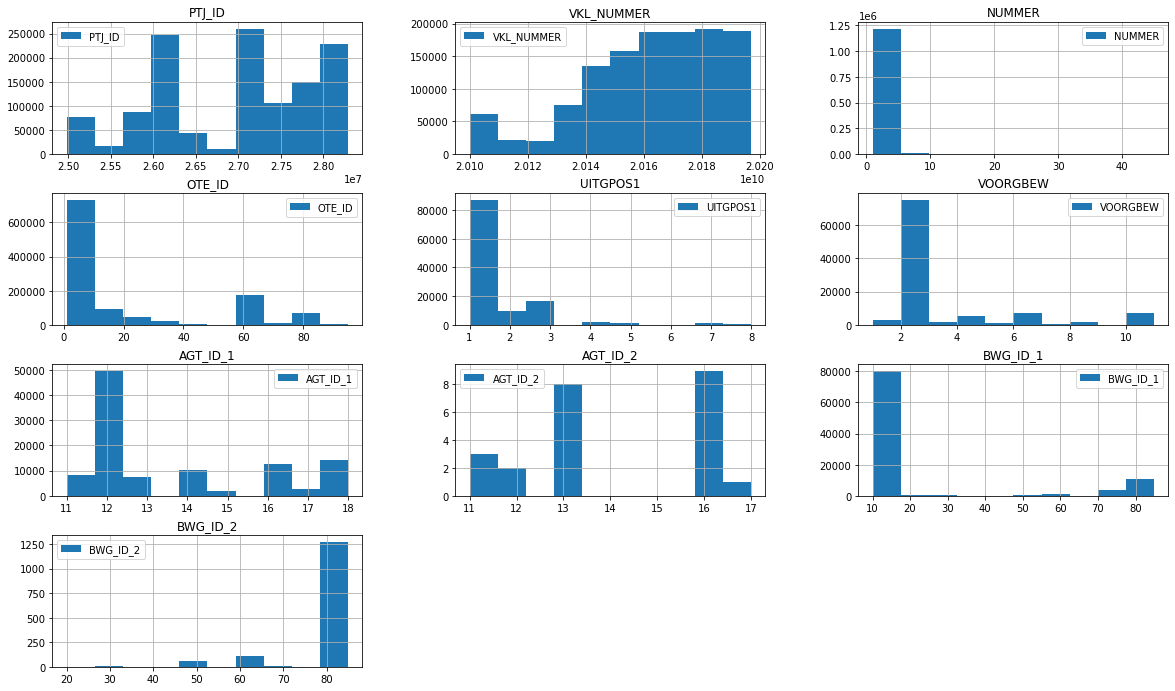

In [31]:
fig, ax = plt.subplots(figsize = (20,15))
partijen_df.hist(layout=(5,3), legend=True, ax = ax)

In [32]:
ongevallen_totaal = ongevallen_sub.merge(partijen_df)
ongevallen_totaal = ongevallen_totaal.merge(puntlocaties_df)
ongevallen_totaal

VKL_NUMMER NIVEAUKOP  JAAR_VKL AP3_CODE  AOL_ID  MAXSNELHD BEBKOM  \
0        20110060504         E      2011      LET       6        NaN    NaN   
1        20110060504         E      2011      LET       6        NaN    NaN   
2        20100246866         S      2010      LET       6        NaN    NaN   
3        20100246866         S      2010      LET       6        NaN    NaN   
4        20100246866         S      2010      LET       6        NaN    NaN   
...              ...       ...       ...      ...     ...        ...    ...   
1222147  20190078930         K      2019      UMS       4        NaN     BI   
1222148  20190078930         K      2019      UMS       4        NaN     BI   
1222149  20190078934         E      2019      LET       0       30.0     BI   
1222150  20190078934         E      2019      LET       0       30.0     BI   
1222151  20190078934         E      2019      LET       0       30.0     BI   

         ANTL_PTJ  WSE_ID  WVL_ID  ...  VOORGBEW  AGT_TYPE AGT_ID_1 AGT_ID_2  \
0               2     1.0     3.0  ...       2.0         V     12.0      NaN   
1               2     1.0     3.0  ...       2.0         V     12.0      NaN   
2               3     1.0     NaN  ...       2.0         V     11.0      NaN   
3               3     1.0     NaN  ...       2.0         V     12.0      NaN   
4               3     1.0     NaN  ...       4.0         V     12.0      NaN   
...           ...     ...     ...  ...       ...       ...      ...      ...   
1222147         3     4.0     1.0  ...       NaN       NaN      NaN      NaN   
1222148         3     4.0     1.0  ...       NaN       NaN      NaN      NaN   
1222149         3     1.0     3.0  ...       NaN       NaN      NaN      NaN   
1222150         3     1.0     3.0  ...       NaN       NaN      NaN      NaN   
1222151         3     1.0     3.0  ...       NaN       NaN      NaN      NaN   

         BWG_ID_1  BWG_ID_2  BWG_AN TDT_AN     X_COORD     Y_COORD  
0            10.0       NaN     NaN    NaN  130986.050  521001.647  
1            10.0       NaN     NaN    NaN  130986.050  521001.647  
2            85.0       NaN     NaN    NaN  130986.050  521001.647  
3            70.0       NaN     NaN    NaN  130986.050  521001.647  
4            10.0       NaN     NaN    NaN  130986.050  521001.647  
...           ...       ...     ...    ...         ...         ...  
1222147       NaN       NaN     NaN    NaN  184713.172  329372.313  
1222148       NaN       NaN     NaN    NaN  184713.172  329372.313  
1222149       NaN       NaN     NaN    NaN  201991.000  363779.000  
1222150       NaN       NaN     NaN    NaN  201991.000  363779.000  
1222151       NaN       NaN     NaN    NaN  201991.000  363779.000  

[1222152 rows x 36 columns]

````{margin}
```{note}
Here is a note!
```
````